# Título do Projeto

## Zuber - Companhia de carros

# Descrição do Projeto
Você está trabalhando como analista da Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. Sua tarefa é encontrar padrões nas informações disponíveis. Você quer entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

Trabalhando com um banco de dados, você analisará dados de concorrentes e testará uma hipótese sobre o impacto do clima na frequência das viagens.

# Descrição dos dados
Um banco de dados com informações sobre corridas de táxi em Chicago:

- tabela neighborhoods: dados sobre os bairros da cidade

-   name: nome do bairro
-   neighborhood_id: código do bairro
-   tabela cabs: dados sobre os táxis

-   cab_id: código do veículo
-   vehicle_id: a identificação técnica do veículo
-   company_name: a empresa proprietária do veículo
-   tabela trips: dados sobre corridas

-   trip_id: código da corrida
-   cab_id: código do veículo que opera a corrida
-   start_ts: data e hora do início da corrida (tempo arredondado para a hora)
-   end_ts: data e hora do final da corrida (tempo arredondado para a hora)
-   duration_seconds: duração da corrida em segundos
-   distance_miles: distância percorrida em milhas
-   pickup_location_id: código do bairro de retirada
-   dropoff_location_id: código do bairro de entrega

- tabela weather_records: dados sobre o clima
-   record_id: código de registro meteorológico
-   ts: grava data e hora (tempo arredondado para a hora)
-   temperature: temperatura quando o registro foi feito
-   description: breve descrição das condições meteorológicas, ex. "chuva leve" ou "nuvens esparsas"-   

Obs: não há uma conexão direta entre as tabelas trips e weather_records no banco de dados. Mas você ainda pode usar JOIN e juntá-las usando a hora em que o passeio começou (trips.start_ts) e a hora em que o registro do tempo foi feito (weather_records.ts).

# Decomposição para completar o projeto
# Passo 1. Escreva um código para analisar os dados sobre o clima em Chicago em novembro de 2017 no site:

- https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

# Passo 2. Análise Exploratória de Dados

- Encontre o número de corridas de táxi para cada empresa de táxi de 15 a 16 de novembro de 2017. Nomeie o campo resultante como trips_amount e imprima-o junto com o campo company_name. Ordene os resultados pelo campo trips_amount em ordem decrescente.

- Encontre o número de corridas para cada empresa de táxi cujo nome contém as palavras "Yellow" ou "Blue" ("Amarelo" ou "Azul", respectivamente) de 1º a 7 de novembro de 2017. Nomeie a variável resultante como trips_amount. Agrupe os resultados pelo campo company_name.

- Em novembro de 2017, as empresas de táxi mais populares eram Flash Cab e Taxi Affiliation Services. Encontre o número de corridas para essas duas empresas e nomeie a variável resultante como trips_amount. Junte as corridas para todas as outras empresas no grupo "Other". Agrupe os dados por nomes de empresas de táxi. Nomeie o campo com os nomes das empresas de táxi como company. Classifique o resultado em ordem decrescente por trips_amount.

# Passo 3. Teste a hipótese de que a duração das corridas do Loop até ao Aeroporto Internacional O'Hare muda em sábados chuvosos.

- Recupere os identificadores dos bairros O'Hare e Loop da tabela neighborhoods.

- Para cada hora, recupere os registros de condições meteorológicas da tabela weather_records. Usando o operador CASE, divida todas as horas em dois grupos: "Bad" se o campo description contiver as palavras "rain" (chuva) ou "storm" (tempestade) e "Good" para outros. Nomeie o campo resultante como weather_conditions. A tabela final deve incluir dois campos: data e hora (ts) e weather_conditions.

- Recupere da tabela trips todos as corridas que começaram no Loop (neighborhood_id: 50) e terminaram em O'Hare (neighborhood_id: 63) em um sábado. Obtenha as condições meteorológicas para cada corrida. Use o método que você aplicou na tarefa anterior. Também recupere a duração de cada corrida. Ignore corridas para as quais os dados sobre as condições meteorológicas não estão disponíveis.

# Passo 4. Análise exploratória de dados (Python)

- Além dos dados recuperados nas tarefas anteriores, você recebeu um segundo arquivo. Agora você tem estes dois CSVs:

- project_sql_result_01.csv. Ele contém os seguintes dados:

- company_name: nome da empresa de táxi
- trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

- project_sql_result_04.csv. Ele contém os seguintes dados:
- dropoff_location_name: bairros de Chicago onde as corridas terminaram
- average_trips: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

- Para esses dois conjuntos de dados, agora você precisa:
- importar os arquivos
- estudar os dados que eles contêm
- verifique se os tipos de dados estão corretos
- identificar os 10 principais bairros em termos de destinos
- fazer gráficos: empresas de táxi e número de corridas, 10 principais bairros por número de corridas em que esse - bairro é destino
- tirar conclusões com base em cada gráfico e explicar os resultados

# Passo 5. Testando hipóteses (Python)
- project_sql_result_07.csv —o resultado da última consulta. Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare. Lembre-se, estes são os valores dos campos da tabela:

- start_ts — data e hora do começo da corrida
- weather_conditions — condições meteorológicas no momento em que a corrida começou
- duration_seconds — duração da viagem em segundos

# Teste a hipótese:
- "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

- Defina o valor do nível de significância (alfa) por conta própria.

# Explique:

- como você formou as hipóteses nula e alternativa
- qual critério você usou para testar a hipótese e porque

In [1]:
# Passo 1 
import requests
from bs4 import BeautifulSoup
import pandas as pd
URL='https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)   
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


In [ ]:
# Passo 2
# Imprima o campo company_name. Encontre o número de corridas de táxi para cada empresa de táxi de 15 a 16 de novembro de 2017,
# nomeie o campo resultante como trips_amount e imprima-o também. Classifique os resultados pelo campo trips_amount em ordem decrescente.
query = """
SELECT 
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
    INNER JOIN trips ON trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY 
    company_name
ORDER BY 
    trips_amount DESC;
"""

In [ ]:
# Encontre o número de corridas para cada empresa de táxi cujo nome contém as palavras "Yellow" ou "Blue"
# ("Amarelo" ou "Azul", respectivamente) de 1 a 7 de novembro de 2017. Nomeie a variável resultante como trips_amount. Agrupe os resultados pelo campo company_name.

query = """
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Yellow%%'
GROUP BY company_name
UNION ALL
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Blue%%'
GROUP BY company_name;
"""

In [ ]:
# De 1 a 7 de novembro de 2017, as empresas de táxi mais populares foram Flash Cab e Taxi Affiliation Services. Encontre o número de corridas para essas duas empresas e
# nomeie a variável resultante como trips_amount. Junte as corridas de todas as outras empresas no grupo "Other". Agrupe os dados por nomes de empresas de táxi.
# Nomeie o campo com os nomes das empresas de táxi company. Ordene o resultado em ordem decrescente por trips_amount.

query = """
SELECT 
    CASE 
        WHEN c.company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN c.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(t.trip_id) AS trips_amount
FROM 
    trips t
JOIN 
    cabs c ON t.cab_id = c.cab_id
WHERE 
    t.start_ts >= '2017-11-01 00:00:00' 
    AND t.start_ts < '2017-11-08 00:00:00'
GROUP BY 
    company
ORDER BY 
    trips_amount DESC;
"""

In [ ]:
# Recupere os identificadores dos bairros O'Hare e Loop da tabela neighborhoods.

query = """
SELECT
    neighborhood_id,
    name
FROM
    neighborhoods
WHERE
    name IN ('O''Hare', 'Loop');
"""

In [ ]:
# Para cada hora, recupere os registros de condições climáticas da tabela weather_records. Usando o operador CASE, divida todas as horas em dois grupos: Bad se o campo descrição
# contiver as palavras rain ou storm e Good para outros. Nomeie o campo resultante como weather_conditions. A tabela final deve incluir dois campos: data e hora (ts) e weather_conditions.

query = """
SELECT
    ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records;
"""

In [35]:
# Recupere da tabela trips todas as corridas que começaram no Loop (pickup_location_id: 50) em um sábado e terminaram em O'Hare (dropoff_location_id: 63). 
# Obtenha as condições meteorológicas para cada corrida. Use o método que você aplicou na tarefa anterior. Além disso, recupere a duração de cada corrida. 
# Ignore corridas para as quais os dados sobre as condições meteorológicas não estão disponíveis. As colunas da tabela devem estar na seguinte ordem:
#start_ts
#weather_conditions
#duration_seconds
#Ordene por trip_id.


query = """ 
SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM 
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM 
        weather_records          
) T on T.ts = trips.start_ts
WHERE 
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id
"""

##  Inicialização

In [4]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

# Carregando os dados

In [5]:
# Importando os arquivos
df1 = pd.read_csv('moved_project_sql_result_01.csv')
df2 = pd.read_csv('moved_project_sql_result_04.csv')
df = pd.read_csv('moved_project_sql_result_07.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
# visualizando os dados de df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# Visualizando os dados de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Obs: Ao utilizar info() podemos observar que não tem dados ausentes nos datasets 1 e 2 em df podemos observar que não há valores ausentes mas para uma analise mais completa dos dados iremos investigar se os dados de duration_second estão corretos ou se precisaram ser alterados/convertidos.

## Pré-processamento dos dados

In [9]:
# Visualizando os dados de df1
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [10]:
# Procurando por valores duplicados
df1.duplicated().sum()

0

In [11]:
# procurando por valores ausentes
df1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [12]:
# Visualizando os dados de df2
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [13]:
# Procurando por valores duplicados
df2.duplicated().sum()

0

In [14]:
# procurando por valores ausentes
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Ao finalizar a etapa de preparação de dados podemos notar que em df1 e em df2 está tudo correto.

# 2.2 estudando os dados

In [15]:
# Observando os dados de df1 
df1.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [16]:
# Observando os dados de df2
df2.head(20)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Analise exploratoria de dados (EDA)

# Identificar os 10 principais bairros em termos de destinos

In [17]:
# Localizando os 10 principais bairros
top_10_neighborhoods = df2.sort_values(by='average_trips', ascending=False).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


# Fazer gráficos: empresas de táxi e número de corridas, top 10 bairros por número de corridas em que esse bairro é destino

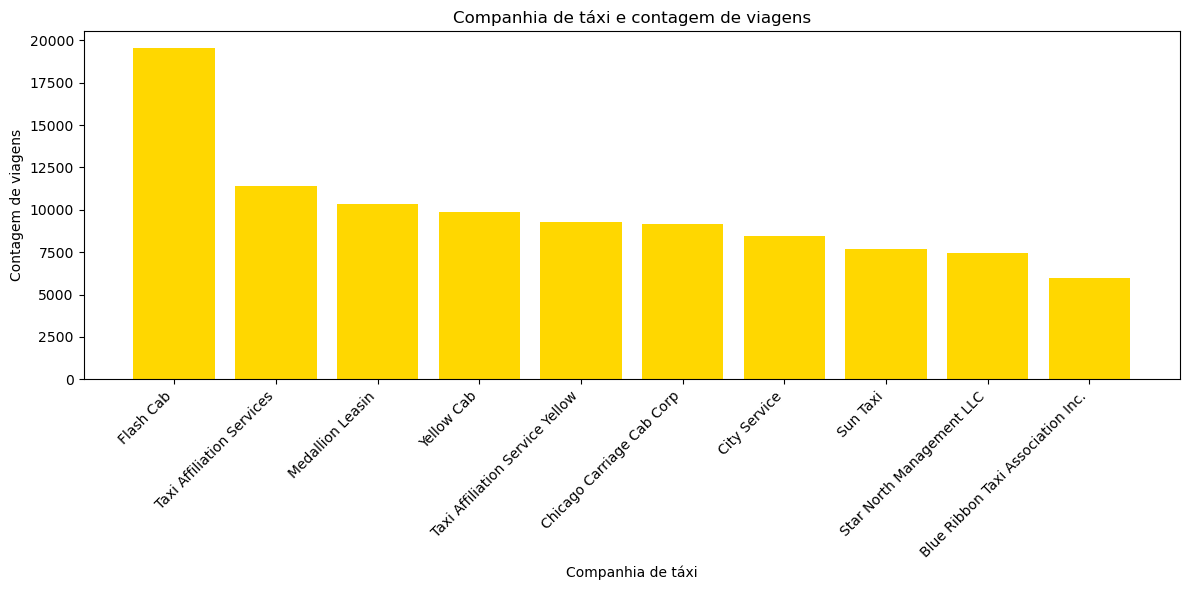

In [18]:
# Selecionar as 10 empresas de táxi e o número de corridas

top_10_companhias = df1.head(10)

# Dados das 10 principais companhias
company_name = top_10_companhias['company_name']
trips_amount = top_10_companhias['trips_amount']

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(company_name, trips_amount, color='gold')

# Adicionando título e rótulos dos eixos x e y
plt.title('Companhia de táxi e contagem de viagens')
plt.xlabel('Companhia de táxi')
plt.ylabel('Contagem de viagens')

# Rotacionar os nomes das companhias para facilitar a visualização dos dados
plt.xticks(rotation=45, ha='right')

# Exibir gráfico
# garantindo espaçamento e visibilade para que os dados não fiquem cortados ou sobrepostos uns aos outros
plt.tight_layout()
plt.show()

Obs:No gráfico acima pode observar que a companhia Flash Cab tem o maior número de viagens realizadas garantindo o podium das nossas companhias de táxi

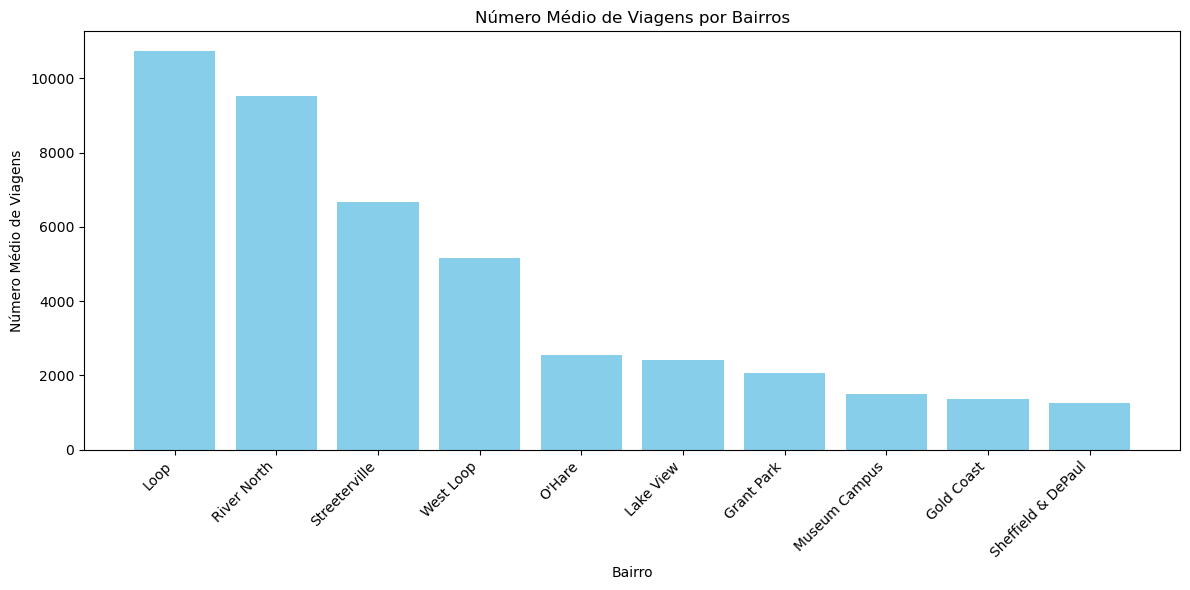

In [19]:
# Selecionar os 10 primeiros bairros mais relevantes para nossa analise

top_10_bairros = df2.head(10) # Definindo os 10 bairros que irei visualizar

# Dados dos 10 primeiros bairros
dropoff_location_name = top_10_bairros['dropoff_location_name']
average_trips = top_10_bairros['average_trips']

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(dropoff_location_name, average_trips, color='skyblue')

# Adicionando título e rótulos dos eixos x e y
plt.title('Número Médio de Viagens por Bairros')
plt.xlabel('Bairro')
plt.ylabel('Número Médio de Viagens')

# Rotacionar os nomes dos bairros para facilitar a  visualização dos dados 
plt.xticks(rotation=45, ha='right')

# Exibir gráfico
# garantindo espaçamento e visibilade para que os dados não fiquem cortados ou sobrepostos uns aos outros
plt.tight_layout()
plt.show()

Obs:No gráfico acima, podemos observar os bairros com maior demanda para destinos. Em primeiro lugar, temos 'Loop', seguido por 'River North' em segundo lugar e 'Streeterville' em terceiro lugar.

# Tirar conclusões com base em cada gráfico e explicar os resultados

Obs: Nos gráficos das companhias de táxi, podemos observar que a empresa 'Flash Cab' está significativamente à frente em termos do número de viagens realizadas em comparação com outras empresas. Além disso, em relação aos destinos mais solicitados, os bairros 'Loop' e 'River North' se destacam como os mais procurados.

## Teste de hipoteses

# A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [20]:
df.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [21]:
# Criando o df para filtrar os dados para os sábados
df['start_ts'] = pd.to_datetime(df['start_ts'])
saturdays = df[df['start_ts'].dt.weekday == 5]

In [22]:
# Separando os sábados com as condições climaticas chuvosas e boas
rainy_saturdays  = saturdays[saturdays['weather_conditions'] == 'Bad']
sunny_saturday = saturdays[saturdays['weather_conditions'] == 'Good']

In [23]:
rainy_saturdays

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


180 dias chuvosos

In [24]:
#sunny_saturday

888 dias ensolarados

In [25]:
# Verificando a media de duração dos sábados chuvosos
#rainy_saturdays_duration_mean = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds'].mean()
#rainy_saturdays_duration_mean

In [26]:
# Verificando a media de duração dos sábados ensolarados ou com um clima tempo bom
#sunny_saturdays_duration_mean = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds'].mean()
#sunny_saturdays_duration_mean

In [27]:
results = st.ttest_ind(rainy_saturdays['duration_seconds'], sunny_saturday['duration_seconds'], equal_var=False)

print('valor-p: ', results.pvalue) #extraindo o valor-p

alpha = 0.05 #nível crítico de significância estatística
# se o valor-p for menor que alfa, rejeitamos a hipótese nula

if results.pvalue < alpha: #comparando o valor-p com o limiar
    print("Rejeitamos a hipótese nula. Há uma diferença significativa na duração média das viagens entre sábados chuvosos e sábados com um clima tempo bom.")
else:
    print("Não podemos rejeitar a hipótese nula. Não há diferença significativa na duração média das viagens entre sábados chuvosos e sábados com um clima tempo bom.")

valor-p:  6.738994326108734e-12
Rejeitamos a hipótese nula. Há uma diferença significativa na duração média das viagens entre sábados chuvosos e sábados com um clima tempo bom.


# Decida onde definir o nível de significância (alfa) por conta própria.

Obs: Escolhi o nivel de significância em 0.05 pois equilibra o risco de cometer erros e é muito comum sua utilização na hora de fazer teste de hipoteses

# Explique: Como você formou as hipóteses nula e alternativa

Obs: Eu formulei a hipótese nula afirmando que não há diferença significativa na duração média das viagens entre sábados chuvosos e sábados com um clima tempo bom e a hipótese alternativa afirma que há uma diferença significativa na duração média das viagens entre sábados chuvosos e sábados com clima tempo bom.

# Qual critério você usou para testar a hipótese e porque? 

Obs: Foi utilizado o "ttest" para fazer comparação de duas amostras no nosso caso foi utilizado a amostra ((A) para sábados chuvosos e (B) para sábados com dia ensolarado) e definimos o valor alpha como 0.05.

Foi utilizado o teste de comparação de duas amostras para mostrar se existem valores significativamente relevantes para nosso teste de hipotese para saber se a duração média das viagens nos sabádos chuvosos são diferentes das viagens aos sábados em dias ensolarados ou com um clima tempo bom e o valor alpha definido em 0.05 foi definido neste valor para equilibrar o risco de cometer algum erro e também por sua utilização ser muito comum em testes de hipoteses.


# Conclusão:

Após seguir todos os padrões estabelecidos para um analista de dados, concluí que há uma diferença na duração média das viagens entre sábados chuvosos e sábados com um clima tempo bom.
Também podemos observar os bairros com maior demanda para destinos, em primeiro lugar, temos 'Loop', seguido por 'River North' em segundo lugar e 'Streeterville' em terceiro lugar, já as companhias de táxi temos Flash Cab no topo do podium, Taxi Affiliation Services como a segunda companhia mais utilizada e para finalizar nosso top 3 temos Medallion Leasing	como as três companhias de táxi mais utilizadas pela população local.